# Create a meshed screen to receive the emitted diffraction radiation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
from MeshedFields import *

The test case computes the diffraction radiation for $\gamma$=20.
So the screen has to intercept at least a 2/$\gamma$=0.1 opening angle.

In [24]:
mesh = MeshedField.CircularMesh(R=1.0, ratio=1.0, lcar=0.03)
print("%d points" % len(mesh.points))
print("%d triangles" % len(mesh.triangles))

4832 points
9446 triangles


Modify the points so that the screen is positioned at z=-10 m from the origin with the normal pointing in positive z direction.

In [25]:
pts = [np.array([-p[0],p[1],-10.0]) for p in mesh.points]
target = MeshedField(pts, mesh.triangles)

In [26]:
target.BoundingBox()

((-1.0, 1.0), (-1.0, 1.0), (-10.0, -10.0))

In [27]:
normals = target.MeshNormals()
print(np.sum(normals, axis=0)/target.Np)

[ 0.  0.  1.]


In [28]:
area = target.MeshArea()
print(np.pi*np.square(0.05)*np.sqrt(2.0))
print(np.sum(area))

0.0111072073454
3.14113274919


### setup the timing of the cells

The peak of the wave packet is assumed to start at the origin at t=0. The arrival time of the signal corresponds to an observation points distance from the origin.

The start time of the traces is 200 steps before the expected time of arrival which is computed as the distance of the observation point divided by the speed of light. The length is 800 steps what accounts for some propagation lines having greater length.

In [29]:
print(10.0/constants.c)

3.3356409519815205e-08


In [30]:
# time step
target.dt = 2.0e-13
# all points use the same timing grid
target.Nt = 800

target.t0 = np.array([np.linalg.norm(p)/constants.c -200*target.dt for p in target.pos])
print(np.min(target.t0))
print(np.max(target.t0)+target.Nt*target.dt)
print(len(target.t0))

3.33164590096e-08
3.36410988839e-08
9446


estimated memory requirements

In [31]:
8*target.Np*target.Nt*6

362726400

## check geometry and write to file

In [11]:
target.ShowMeshedField(showCenters=False,showAxes=True)

In [32]:
filename="../tests/BackwardDiffractionRadiation.h5"
target.WriteMeshedField(filename)

not writing ElMagField dataset


## check the source file

corner points :  (1626, 3)
triangles :  (3120, 3)
Nt = 500   dt = 2e-13 
t0 :  (3120,)
field :  (3120, 500, 6)
-5e-11
-5e-11
peak energy density = 0.019487 J/m² at cell 2765
total pulse energy = 0.471 µJ
total energy flow vector = [  4.61564429e-10   6.33795504e-10   4.71053101e-01] µJ


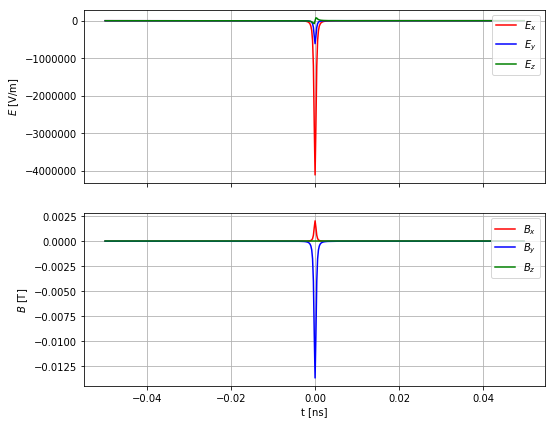

In [22]:
filename="../tests/DiffractionScreenWithFields.h5"
source = MeshedField.ReadMeshedField(filename)

print(np.min(source.t0))
print(np.max(source.t0))

area = source.MeshArea()
S = [np.linalg.norm(source.EnergyFlowVector(i)) for i in range(source.Np)]
PeakIndex = np.argmax(S)
SV = np.sum([source.EnergyFlowVector(i)*area[i] for i in range(source.Np)],axis=0)
Pz = [source.NormalEnergyFlow(i) for i in range(source.Np)]

print("peak energy density = %.6f J/m² at cell %d" % (np.max(S),PeakIndex))
print("total pulse energy = %.3f µJ" % (1e6*np.dot(area,Pz)))
print("total energy flow vector = %s µJ" % (1e6*SV))

source.ShowMeshedField(scalars=Pz,scalarTitle="Pz",highlight=[PeakIndex])
source.ShowFieldTrace(PeakIndex)

## check the target file after propagation

In [34]:
filename="../tests/BackwardDiffractionRadiation.h5"
computed = MeshedField.ReadMeshedField(filename)

print("%d points" % len(computed.points))
print("%d triangles" % len(computed.triangles))
area = computed.MeshArea()
normals = computed.MeshNormals()
average = np.sum(normals, axis=0)/computed.Np
print("total mesh area = %7.3f cm²" % (1.0e4*np.sum(area)))
print("screen normal = %s" % average)

corner points :  (4832, 3)
triangles :  (9446, 3)


IndexError: index -1160584715 is out of bounds for axis 0 with size 4832